#  <p style="text-align: center;">MIS 285N - Big Data and Distributed Programming</p>
## <p style="text-align: center;">Problem Set 2: Machine Learning Experiments</p>
## <p style="text-align: center;">Total points: 50</p>
## <p style="text-align: center;">Due: Tuesday, 20th September submitted via Canvas by 11:59 pm</p>
### <p style="text-align: center;">Submitted by: Deeksha Pandit</p>

Your homework should be written in a **Jupyter notebook**.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting.


## Task 1: Logistic Regression on PCA components
In the following code, you have to add a few lines to apply logistic regression to the PCA components. More specifically:
 0. Load the Iris Dataset
 1. Implement Standard Scalar based feature extraction
 2. Implement PCA and use all components and compute the explained variance of each PCA component
 3. Implement PCA and use two components that explain maximum variance. Implement logistic regression model to train and test and give a visual display of the performance by showing a plot of the decision regions along with the test data. Print the test accuracy.

In [47]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # plotting decision regions
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.6, edgecolor='blue', marker=markers[idx], label=cl)

    # test samples
    if test_idx:
        # plot graph
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0],X_test[:, 1],alpha=1.0,edgecolor='blue',linewidths=1,marker='o',s=55, label='test set')
        
def versiontuple(v):
    return tuple(map(int, (v.split("."))))

In [48]:
# Loading the iris dataset and using all the features
iris = pd.read_csv(r'/Users/deekshapandit/Desktop/Big Data/Assignment2/Iris.csv')
iris['Species'] = iris['Species'].replace(['Iris-setosa'],0)
iris['Species'] = iris['Species'].replace(['Iris-versicolor'],1)
iris['Species'] = iris['Species'].replace(['Iris-virginica'],2)
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


<!-- ### The above plot depicts that the 1st principle component captures 72% of the variance and first two combined holds ~96% of the variance -->

/var/folders/sv/8pbk7f_j7b35szzr7637336m0000gn/T/ipykernel_37873/2462927426.py:29: UserWarning: You passed a edgecolor/edgecolors ('blue') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.6, edgecolor='blue', marker=markers[idx], label=cl)


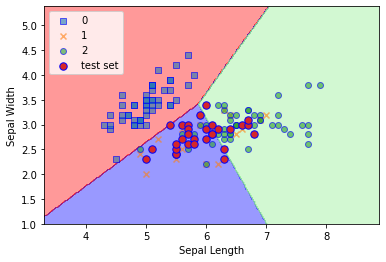

In [49]:
# Plot LogisticRegression for two features without Standardization and without PCA
X = iris.iloc[:, [1,2]].values
y = iris.iloc[:, 5].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
plot_decision_regions(X, y, classifier=classifier,test_idx=range(70, 100))
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(loc='upper left')
plt.show()

In [50]:
# Compute accuracy
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy = %.2f' % accuracy_score(y_test,y_pred))

Accuracy = 0.82


/var/folders/sv/8pbk7f_j7b35szzr7637336m0000gn/T/ipykernel_37873/2462927426.py:29: UserWarning: You passed a edgecolor/edgecolors ('blue') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.6, edgecolor='blue', marker=markers[idx], label=cl)


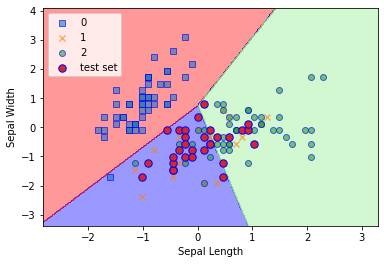

In [51]:
# Plot LogisticRegression for two features with Standardization and without PCA
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
X_std = sc.transform(X)
classifier_std = LogisticRegression(random_state=0)
classifier_std.fit(X_train_std, y_train)
plot_decision_regions(X_std, y, classifier=classifier_std,test_idx=range(70, 100))
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(loc='upper left')
plt.show()

In [52]:
# Compute accuracy 
y_pred = classifier_std.predict(X_test_std)
from sklearn.metrics import accuracy_score
print('Accuracy = %.2f' % accuracy_score(y_test,y_pred))

Accuracy = 0.82


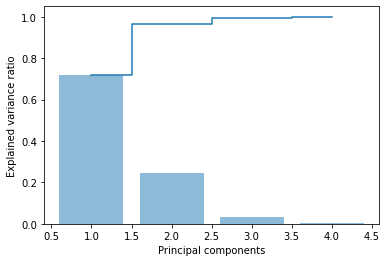

PCA explained variance ratio =  [0.71803699 0.24442718 0.03337158 0.00416425]


In [53]:
# Plot LogisticRegression for two features with Standardization and with PCA
sc = StandardScaler()
X, y = iris.iloc[:, [1,2,3,4]].values, iris.iloc[:, 5].values 

# train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)

sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
# Compute PCA() and plot explained variance ratio vs principal components
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
plt.bar(range(1, 5), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 5), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.show()
print("PCA explained variance ratio = ", pca.explained_variance_ratio_)

In [ ]:
# According to the above graph, the first principle component accounts for 72% of the variance, 
# while the first two together account for 96% of the variance.

Train Accuracy = 0.9
Test Accuracy = 0.91


/var/folders/sv/8pbk7f_j7b35szzr7637336m0000gn/T/ipykernel_37873/2462927426.py:29: UserWarning: You passed a edgecolor/edgecolors ('blue') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.6, edgecolor='blue', marker=markers[idx], label=cl)


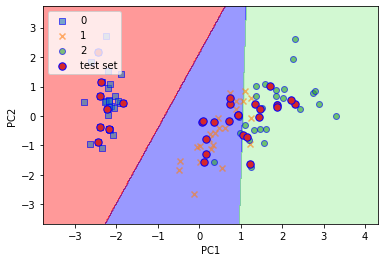

In [54]:
# PCA for top two components
pca = PCA(n_components=2)
X_scaled = sc.fit_transform(X)
X_pca = pca.fit_transform(X_scaled)
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.30, shuffle=True, random_state=2)

# Run LogisticRegression and train the model
classifier_pca = LogisticRegression(random_state=0)
classifier_pca.fit(X_train_pca, y_train)

# Make predictions and get train and test accuracy
y_pred = classifier_pca.predict(X_test_pca)
y_true = y_test
print("Train Accuracy =", np.round(accuracy_score(y_train, classifier_pca.predict(X_train_pca)), 2))
print("Test Accuracy =", np.round(accuracy_score(y_true, y_pred), 2))

# Plot the two components
plot_decision_regions(X_train_pca, y_train, classifier=classifier_pca,test_idx=range(70, 100))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(loc='upper left')
plt.show()

Confusion Matrix


Text(33.0, 0.5, 'True')

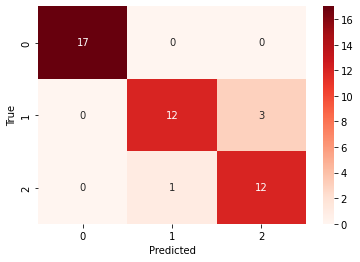

In [57]:
cf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
# EXPLAINATION
# After using PCA, test accuracy increased from 82% to 91%. 
# The model is currently operating well on test data and is more generalized.

# Task 2 

In this exercise, we will take two features from the iris dataset and train using AdalineGD vs. AdalineSGD based on the implementation provided below and the perceptron model implementations from scikit-learn and one provided below.  
You should have three plots (Adaline Rule vs. AdalineSGD vs. scikit Perceptron) along with performance comparison between these four methods. What do you observe in terms of performance difference? Please explain your interpretation. 

However, you are free to use any combination of two features out of 4 features given in this dataset. 


Initial Weights: [0. 0. 0.]
New Weights: [0.05       0.69020908 0.83922997]
Cost: 36.5
New Weights: [ 0.0475     -0.07793443  0.19390559]
Cost: 30.93423328078246
New Weights: [0.047625   0.52459857 0.89766294]
Cost: 26.458715322083464
New Weights: [ 0.04761875 -0.12073449  0.33575636]
Cost: 22.756711132912088
New Weights: [0.04761906 0.40273631 0.92798511]
Cost: 19.676535218377207
New Weights: [ 0.04761905 -0.14114823  0.44076908]
Cost: 17.10125761384329
New Weights: [0.04761905 0.31195761 0.94057964]
Cost: 14.939413658563408
New Weights: [ 0.04761905 -0.14761911  0.51949574]
Cost: 13.11859234336571
New Weights: [0.04761905 0.24346034 0.94229997]
Cost: 11.580825331014973
New Weights: [ 0.04761905 -0.14569812  0.57928825]
Cost: 10.279236002408314

Misclassified Samples = 18
Accuracy = 0.60


/var/folders/sv/8pbk7f_j7b35szzr7637336m0000gn/T/ipykernel_37873/2462927426.py:29: UserWarning: You passed a edgecolor/edgecolors ('blue') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.6, edgecolor='blue', marker=markers[idx], label=cl)


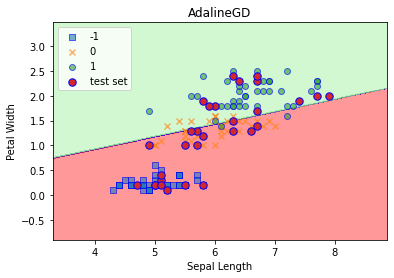

In [58]:
# Sebastian Raschka's implementation of the Adaline Rule
from sklearn.metrics import accuracy_score
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    cost_ : list
        Sum-of-squares cost function value in each epoch.
        (After training, we can look at this to see if our algorithm converged)
    """
    def __init__(self, eta=0.01, n_iter=50, debug=False):
        self.eta = eta
        self.n_iter = n_iter
        self.debug = debug

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        if self.debug: print("Initial Weights:", self.w_)
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression, we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
            if self.debug: print("New Weights:", self.w_)
            if self.debug: print("Cost:", cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)
    
    
## your code here

iris_t2 = pd.read_csv(r'Iris.csv')

# pre-processing steps
iris_t2['Species'] = iris_t2['Species'].replace(['Iris-setosa'],-1)
iris_t2['Species'] = iris_t2['Species'].replace(['Iris-versicolor'],0)
iris_t2['Species'] = iris_t2['Species'].replace(['Iris-virginica'],1)
X = iris_t2.iloc[:150, [1,4]].values
y = iris_t2.iloc[:150, 5].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# StandardScaler() from task 1
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
ada = AdalineGD(n_iter=10,eta=0.01, debug=True)
ada.fit(X_train_std,y_train)

# Make predictions
y_pred = ada.predict(X_test_std)

print('\nMisclassified Samples = %d' %(y_test != y_pred).sum())
print('Accuracy = %.2f' % accuracy_score(y_test,y_pred))

# Plot graphs
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=ada,test_idx=range(70, 100))
plt.title('AdalineGD')
plt.legend(loc='upper left')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.show()

Misclassified Samples = 18
Accuracy = 0.60


/var/folders/sv/8pbk7f_j7b35szzr7637336m0000gn/T/ipykernel_37873/2462927426.py:29: UserWarning: You passed a edgecolor/edgecolors ('blue') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.6, edgecolor='blue', marker=markers[idx], label=cl)


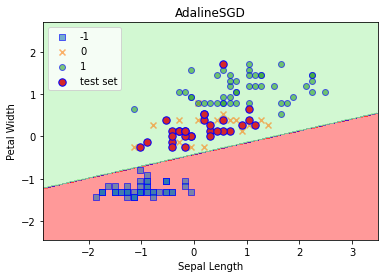

In [59]:
from numpy.random import seed

class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    cost_ : list
        Sum-of-squares cost function value averaged over all
        training samples in each epoch.
    shuffle : bool (default: True)
        Shuffles training data every epoch if True to prevent cycles.
    random_state : int (default: None)
        Set random state for shuffling and initializing the weights.
        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        if random_state:
            seed(random_state)
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to zeros"""
        self.w_ = np.zeros(1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.net_input(xi)
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)
    
    
## your code here
iris_t3 = pd.read_csv(r'Iris.csv')

iris_t3['Species'] = iris_t3['Species'].replace(['Iris-setosa'],-1)
iris_t3['Species'] = iris_t3['Species'].replace(['Iris-versicolor'],0)
iris_t3['Species'] = iris_t3['Species'].replace(['Iris-virginica'],1)

X = iris_t3.iloc[:, [1,4]].values
y = iris_t3.iloc[:, 5].values

X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

adasgd = AdalineSGD(n_iter=40, eta=0.1, random_state=1)
# We are using all but the first input sample to train (no split)
adasgd.fit(X_std[1:, :], y[10:])

print('Misclassified Samples = %d' %(y_test != y_pred).sum())
print('Accuracy = %.2f' % accuracy_score(y_test,y_pred))

# Plot graph
plot_decision_regions(X_std[1:, :],  y[1:], classifier=adasgd,test_idx=range(70, 100))
plt.title('AdalineSGD')
plt.legend(loc='upper left')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.savefig('adalineSGD.png', dpi=300)
plt.show()

Misclassified Samples = 11
Accuracy = 0.76


/var/folders/sv/8pbk7f_j7b35szzr7637336m0000gn/T/ipykernel_37873/2462927426.py:29: UserWarning: You passed a edgecolor/edgecolors ('blue') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.6, edgecolor='blue', marker=markers[idx], label=cl)


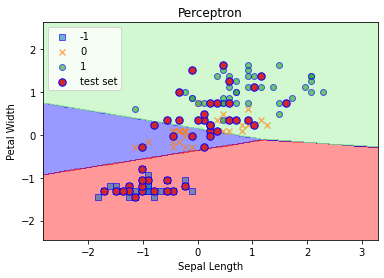

In [60]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

## your code here
iris_t4 = pd.read_csv(r'Iris.csv')
iris_t4['Species'] = iris_t4['Species'].replace(['Iris-setosa'],-1)
iris_t4['Species'] = iris_t4['Species'].replace(['Iris-versicolor'],0)
iris_t4['Species'] = iris_t4['Species'].replace(['Iris-virginica'],1)

X = iris_t4.iloc[:, [1,4]].values
y = iris_t4.iloc[:, 5].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# StandardScaler() from task 1
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

ppn = Perceptron(max_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
print('Misclassified Samples = %d' % (y_test != y_pred).sum())
print('Accuracy = %.2f' % accuracy_score(y_test, y_pred))

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# Plot graph
plot_decision_regions(X=X_combined_std, y=y_combined,classifier=ppn, test_idx=range(105, 150))
plt.title('Perceptron')
plt.legend(loc='upper left')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.savefig('iris_perceptron_scikit.png', dpi=300)
plt.show()

Misclassified Samples = 18
Accuracy = 0.60


/var/folders/sv/8pbk7f_j7b35szzr7637336m0000gn/T/ipykernel_37873/2462927426.py:29: UserWarning: You passed a edgecolor/edgecolors ('blue') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.6, edgecolor='blue', marker=markers[idx], label=cl)


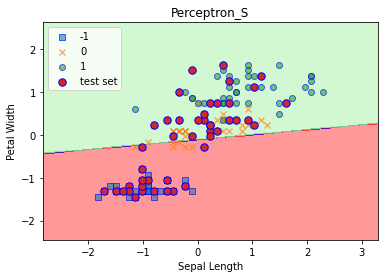

In [61]:
# Sebastian Raschka's implementation of the Perceptron Learning rule
import numpy as np

class Perceptron_S(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01,n_iter=10,debug=False,random_seed=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_seed = random_seed
        self.debug = debug

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_seed) 
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        if self.debug: print("Initial Weights:", self.w_)
        for iter in range(self.n_iter):
            errors = 0
            if self.debug: print("Iteration:", iter)
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                if self.debug: print(xi, target, self.predict(xi), update)
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
                if self.debug: print("New Weights:", self.w_)
            self.errors_.append(errors) 
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

    
ppn1 = Perceptron_S(n_iter=40, eta=0.1, random_seed=0)
ppn1.fit(X_train_std, y_train)
y_pred = ppn1.predict(X_test_std)
print('Misclassified Samples = %d' % (y_test != y_pred).sum())
print('Accuracy = %.2f' % accuracy_score(y_test, y_pred))

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# plot graphs
plot_decision_regions(X=X_combined_std, y=y_combined,classifier=ppn1, test_idx=range(105, 150))
plt.title('Perceptron_S')
plt.legend(loc='upper left')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.show()

## Task 3 Explore parameter tuning in Scikit Logistic regression

We have seen that the 'C' parameter in logistic regression determines the strength of logistic regression. In this exercise, you will tune the 'C' parameter to get best performance from the model for iris data classification. 
Write the code to run logistic regression on iris data and report the performance for 10 different values of 'C' (just Accuracy will do).

In [62]:
iris_3 = pd.read_csv("iris.csv")
iris_3['Species'] = iris_3['Species'].replace(['Iris-setosa'],0)
iris_3['Species'] = iris_3['Species'].replace(['Iris-versicolor'],1)
iris_3['Species'] = iris_3['Species'].replace(['Iris-virginica'],2)

X, Y = iris_3.iloc[:, [1,2,3,4]].values, iris_3.iloc[:, 5].values
# train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

In [63]:
def logistic_regression_model(c):
    lr = LogisticRegression(C=c, random_state=0, multi_class="ovr")
    lr.fit(X_train, Y_train)
    Y_pred = lr.predict(X_test)
    print('\nMisclassified Samples = %d' %(Y_test != Y_pred).sum())
    print('Accuracy = %.2f' % accuracy_score(Y_test,Y_pred))
    print('C value = %2f'%c)

In [69]:
C = np.arange(0.5, 2.5, 0.2).tolist() # 10 values - 0.5 to 2.5
for i in C:
    logistic_regression_model(i)


Misclassified Samples = 4
Accuracy = 0.91
C value = 0.500000

Misclassified Samples = 3
Accuracy = 0.93
C value = 0.700000

Misclassified Samples = 2
Accuracy = 0.96
C value = 0.900000

Misclassified Samples = 2
Accuracy = 0.96
C value = 1.100000

Misclassified Samples = 1
Accuracy = 0.98
C value = 1.300000

Misclassified Samples = 1
Accuracy = 0.98
C value = 1.500000

Misclassified Samples = 1
Accuracy = 0.98
C value = 1.700000

Misclassified Samples = 1
Accuracy = 0.98
C value = 1.900000

Misclassified Samples = 1
Accuracy = 0.98
C value = 2.100000

Misclassified Samples = 1
Accuracy = 0.98
C value = 2.300000


## Task 4 Explore parameter tuning in SVM

Similar to the previous task, use the SVM model for various kernels: ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’ and report the performance (just Accuracy will do). 

In [71]:
from sklearn.svm import SVC

iris_4 = pd.read_csv("iris.csv")
iris_4['Species'] = iris_4['Species'].replace(['Iris-setosa'],0)
iris_4['Species'] = iris_4['Species'].replace(['Iris-versicolor'],1)
iris_4['Species'] = iris_4['Species'].replace(['Iris-virginica'],2)

# for first three features
X =iris_4.iloc[0:, [1,2,3,4]].values
y = iris_4.iloc[0:, 5].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [72]:
svm = SVC(kernel='linear', C=10.0, random_state=0)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print('Misclassified Samples = %d' %(y_test != y_pred).sum())
print("Accuracy = ", accuracy_score(y_test, y_pred)*100,"%")

Misclassified Samples = 1
Accuracy =  97.77777777777777 %


In [73]:
svm = SVC(kernel='poly', C=10.0, random_state=0)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print('Misclassified Samples = %d' %(y_test != y_pred).sum())
print("Accuracy =", accuracy_score(y_test, y_pred)*100,"%")

Misclassified Samples = 2
Accuracy = 95.55555555555556 %


In [74]:
svm = SVC(kernel='rbf', C=10.0, random_state=0)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print('Misclassified Samples = %d' %(y_test != y_pred).sum())
print("Accuracy =", accuracy_score(y_test, y_pred)*100,"%")

Misclassified Samples = 1
Accuracy = 97.77777777777777 %


In [75]:
svm = SVC(kernel='sigmoid', C=10.0, random_state=0)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print('Misclassified Samples = %d' %(y_test != y_pred).sum())
print("Accuracy =", accuracy_score(y_test, y_pred)*100,"%")

Misclassified Samples = 37
Accuracy = 17.77777777777778 %
